#### Project 4 Comcast Telecom Consumer Complaints 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import data into Python environment.

In [3]:
df_complaints = pd.read_csv("E:/Data/Comcast_telecom_complaints_data.csv")

In [4]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df_complaints["date_index"] = df_complaints["Date_month_year"] + " " + df_complaints["Time"]
df_complaints["date_index"] = pd.to_datetime(df_complaints["date_index"])
df_complaints["Date_month_year"] = pd.to_datetime(df_complaints["Date_month_year"])
df_complaints = df_complaints.set_index(df_complaints["date_index"])

In [6]:
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


#### Trend chart for the number of complaints at monthly granularity levels

<AxesSubplot:xlabel='date_index'>

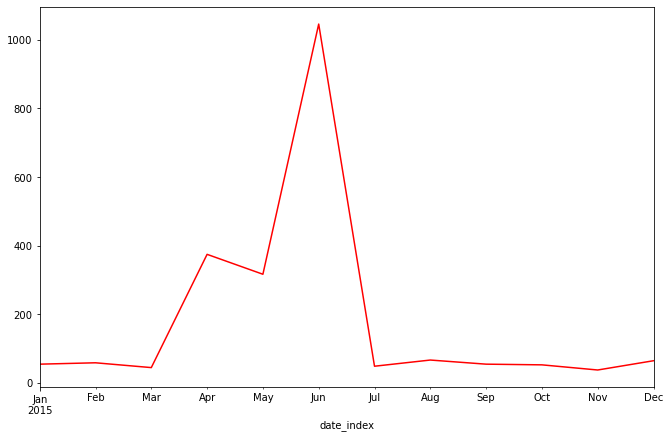

In [7]:
df_complaints.groupby(pd.Grouper(freq="M")).size().plot(figsize = (11,7), color = 'red')

#### Trend chart for the number of complaints at daily granularity levels

In [12]:
df_complaints['Day of Month'] = pd.to_datetime(df_complaints["Date"])
df_complaints = df_complaints.set_index(df_complaints["Day of Month"])
df_complaints['Day of Month'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-24      7
2015-05-02      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Day of Month, Length: 91, dtype: int64

<AxesSubplot:xlabel='Day of Month'>

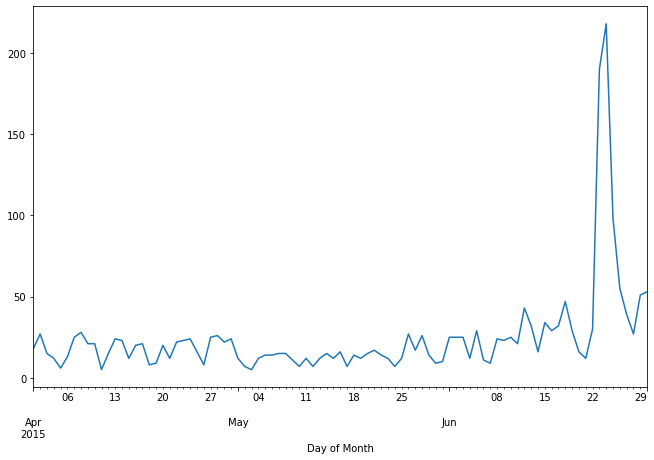

In [10]:
df_complaints.groupby(pd.Grouper(freq="D")).size().plot(figsize = (11,7))

#### Provide a table with the frequency of complaint types

In [13]:
df_type = df_complaints["Customer Complaint"].value_counts()

In [14]:
df_type.head(25)

Comcast                             83
Comcast Internet                    18
Comcast Data Cap                    17
comcast                             13
Comcast Data Caps                   11
Comcast Billing                     11
Data Caps                           11
Unfair Billing Practices             9
Data Cap                             8
Comcast data cap                     8
Internet speed                       8
Comcast/Xfinity                      8
Comcast data caps                    8
Comcast internet                     8
COMCAST                              6
Comcast service                      6
Comcast Service                      6
Billing                              6
Comcast billing                      6
Internet Speed                       5
Comcast complaint                    5
Comcast Complaint                    5
Comcast Internet Service             5
Comcast Unfair Billing Practices     4
Data cap                             4
Name: Customer Complaint,

#### Python is case-sensitive it is treating Comcast, COMCAST and comcast as two different complaints.If all complaints are changed to upper case then it will give a correct count.

In [15]:
df_type = df_complaints['Customer Complaint'].str.upper().value_counts()

In [16]:
df_type.head(25)

COMCAST                      102
COMCAST DATA CAP              30
COMCAST INTERNET              29
COMCAST DATA CAPS             21
COMCAST BILLING               18
COMCAST SERVICE               15
INTERNET SPEED                15
UNFAIR BILLING PRACTICES      13
DATA CAPS                     13
DATA CAP                      12
COMCAST COMPLAINT             11
COMCAST/XFINITY               11
COMCAST INTERNET SERVICE      10
BILLING                        9
BILLING ISSUES                 8
COMCAST BILLING PRACTICES      5
SERVICE ISSUES                 5
COMCAST CABLE                  5
COMCAST BILLING COMPLAINT      5
INTERNET                       5
COMPLAINT AGAINST COMCAST      5
SLOW INTERNET                  5
COMCAST ISSUES                 5
INTERNET SERVICE               5
COMCAST XFINITY                4
Name: Customer Complaint, dtype: int64

###### Complaint types are maximum  around Comcast , Comcast data Cap , Comcast Internet , Comcast data Cap , Comcast Billing

#### Create a new categorical variable with value as Open and Closed. 
Open & Pending is to be categorized as Open 
and Closed & Solved is to be categorized as Closed.

In [18]:
# Open & Pending Category will be categorized as Open, else status is closed
df_complaints["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df_complaints["Status"]]

#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [22]:
df_status = df_complaints.groupby('State').newStatus.value_counts().unstack()
#df_status = df_complaints.groupby(['State','newStatus'])['COUNT'].sum().unstack()

In [23]:
df_status.head(25)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

<Figure size 2000x1000 with 0 Axes>

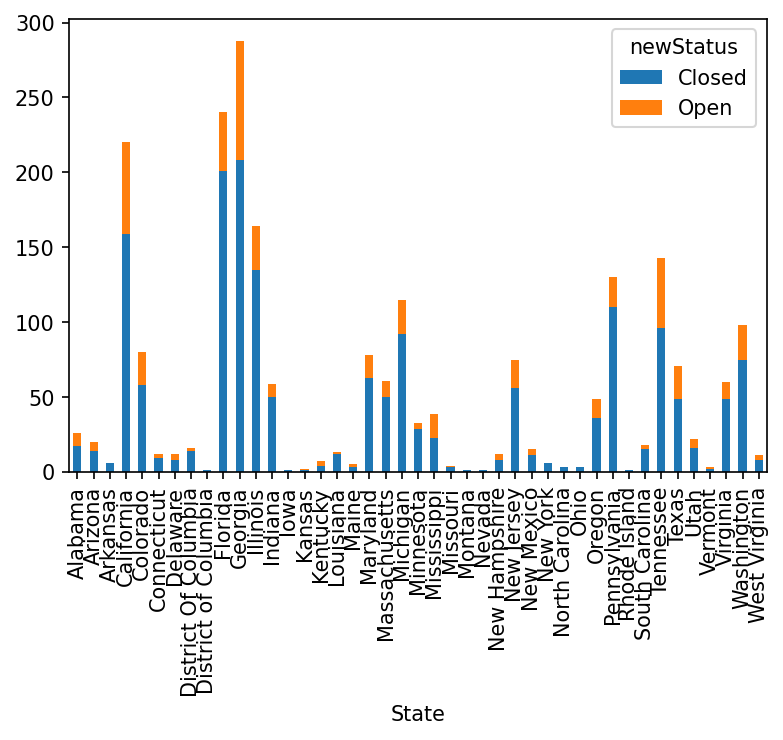

In [30]:
plt.figure(figsize=(20,10)) 
plt.rcParams['figure.dpi'] = 150
# Stacked = True, Stacked Plot
df_status.plot(kind='bar', stacked=True)

* Which state has the maximum complaints

#### Georgia has maximum number of complaints

#### Which state has the highest percentage of unresolved complaints

In [31]:
# Unresolved complaints distribution across State
df_unresolved = df_complaints[df_complaints['newStatus']=='Open']
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)

Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Washington       23
Michigan         23
Colorado         22
Texas            22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Virginia         11
Massachusetts    11
Alabama           9
Indiana           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Kentucky          3
Name: State, dtype: int64

In [35]:
df_unresolved/df_complaints.shape[0]

Georgia                 0.035971
California              0.027428
Tennessee               0.021133
Florida                 0.017536
Illinois                0.013040
Washington              0.010342
Michigan                0.010342
Colorado                0.009892
Texas                   0.009892
Pennsylvania            0.008993
New Jersey              0.008543
Mississippi             0.007194
Maryland                0.006745
Oregon                  0.005845
Virginia                0.004946
Massachusetts           0.004946
Alabama                 0.004047
Indiana                 0.004047
Arizona                 0.002698
Utah                    0.002698
New Hampshire           0.001799
Delaware                0.001799
Minnesota               0.001799
New Mexico              0.001799
Kentucky                0.001349
South Carolina          0.001349
West Virginia           0.001349
Connecticut             0.001349
Maine                   0.000899
District Of Columbia    0.000899
Kansas    

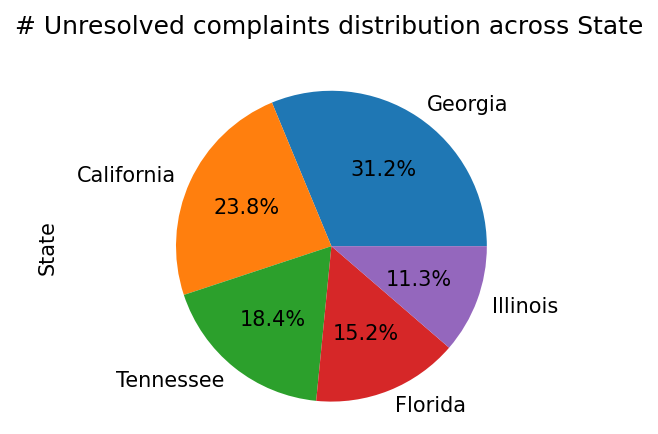

In [36]:
df_unresolved.head().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

#### Georgia has maximum percentage of unresolved complaints

#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [37]:
df_received = df_complaints[df_complaints['Received Via'].isin(['Internet','Customer Care Call'])]

In [38]:
df_received.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day of Month,newStatus
Day of Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


In [39]:
df_received.newStatus.value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

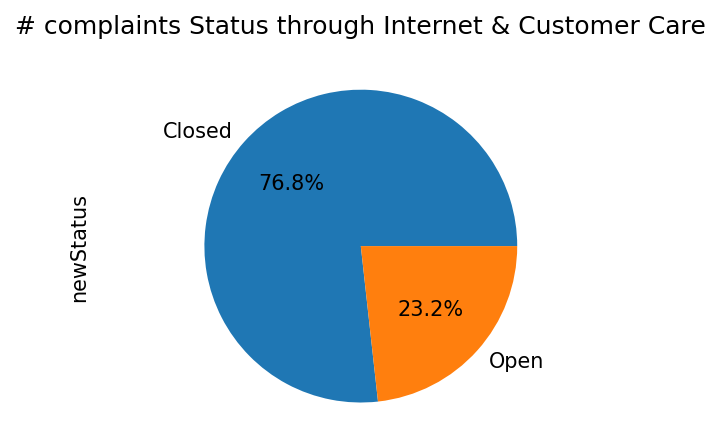

In [40]:
df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

In [41]:
df_received_closed = df_received[df_received['newStatus']=='Closed']

In [42]:
df_received_closed.newStatus.value_counts()

Closed    1707
Name: newStatus, dtype: int64